In [7]:
import numpy as np
from functions import *
from system_class import system
import matplotlib.pyplot as plt
import time 
#import qutip asqt
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%load_ext autoreload
%autoreload 2
pi=np.pi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
g= -0.05 * 2*pi
w = 5.5 * 2*pi
wq = 4.9 * 2*pi
Ad=0.0025 * 2*np.pi
wd=5.5 * 2*np.pi
gamma=0.01 * 2*np.pi

tmax = 360
tint = tmax/3600
nsteps = int( tmax / tint - 1 )
times = np.linspace( 0, tmax, nsteps )
nsteps = len( times )

spinx_arr = np.zeros(  nsteps )
spinz_arr = np.zeros(  nsteps )
pop01 = np.zeros(  nsteps )
n_arr = np.zeros(  nsteps) 

s = system(w01=wq,g=g,w=w,wd=wd,gamma=gamma,Ad=Ad,\
           cavity_dim=4, qubit_dim=2, dvice='TRSM0', atol=1e-8,rtol=1e-6, max_step=1e-4 )
s.set_initial_qb_state([1])
s.set_initial_cs_state( alpha=0 )
s.initialise_density_matrix()

print(s.paramchar(times[-1]))

Nq, Nc  = 2, 4
w01, wc, wd  =  4.9000,  5.5000,  5.5000 
Ad  =  0.0025 
ah  = 15915494.1500 
g  = -0.0500 
kappa  =  0.0100 
atol  = 1.0e-08 
rtol  = 1.0e-06 
max_step  = 1e-04 
couling_type  = 00 
device  = TRSM0 
tmax360_Nq2_Nc4_amp0.0025_kappa0.0100_wq4.9000_anh15915494.1500_wc5.5000_wd5.5000_ms1e-04_dimexp20_qb[1]_00_TRSM0


t= 0.0 ||       0
t= 36.0 ||      35
t= 72.0 ||      35
t= 108.1 ||      35
t= 144.1 ||      35
t= 180.1 ||      35
t= 216.1 ||      36
t= 252.2 ||      35
t= 288.3 ||      35
t= 324.3 ||      36


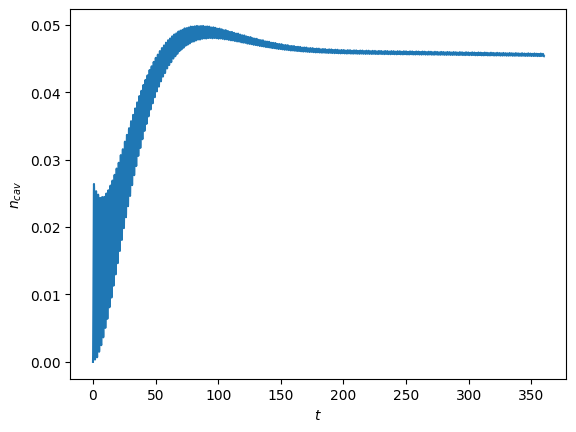

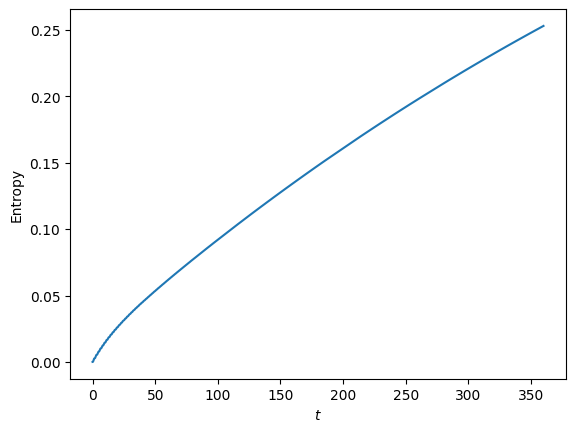

In [9]:
t1 = time.time()
rhos = s.time_evolve( times )
t2 = time.time()
s.save_and_plot( times, rhos, [0] )